#a

In [ ]:
pip install jupyterlab folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas geopandas shapely

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import great_circle
from sklearn.cluster import DBSCAN as dbscan
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from ipywidgets import FileUpload

upload = FileUpload()
upload


FileUpload(value={}, description='Upload')

In [ ]:
data = pd.read_csv("C:\\Users\\ASUS\\fire_archive_M-C61_466375.csv")
data

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-4.0605,135.7863,326.1,1.0,1.0,2019-01-01,119,Terra,MODIS,83,6.03,287.2,24.1,D,0
1,-4.0530,136.6032,313.3,1.0,1.0,2019-01-01,119,Terra,MODIS,72,6.03,292.2,9.1,D,0
2,-4.0591,135.7771,305.3,1.0,1.0,2019-01-01,119,Terra,MODIS,42,6.03,287.5,5.0,D,0
3,2.7885,125.4074,313.8,1.2,1.1,2019-01-02,201,Terra,MODIS,59,6.03,282.7,12.3,D,1
4,2.7788,125.4072,329.2,1.2,1.1,2019-01-02,201,Terra,MODIS,82,6.03,284.5,30.8,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90470,1.4393,125.1176,310.5,3.3,1.7,2019-12-31,440,Aqua,MODIS,20,6.03,293.3,35.6,D,0
90471,-1.4587,127.4401,307.4,1.0,1.0,2019-12-31,1404,Terra,MODIS,54,6.03,284.8,7.3,N,0
90472,0.0846,103.4051,307.1,1.1,1.0,2019-12-31,1543,Terra,MODIS,70,6.03,289.9,7.9,N,0
90473,1.4946,127.6414,303.1,1.0,1.0,2019-12-31,1700,Aqua,MODIS,53,6.03,290.6,5.0,N,1


Shapefile berhasil dimuat!
  kode_pro provinsi fid              nama                     label  \
0       18  Lampung  18  Provinsi Lampung  Provinsi Lampung, 18, 18   

                                            geometry  
0  MULTIPOLYGON (((104.60199 -5.93363, 104.60202 ...  

Sistem Referensi Koordinat (CRS): EPSG:4326


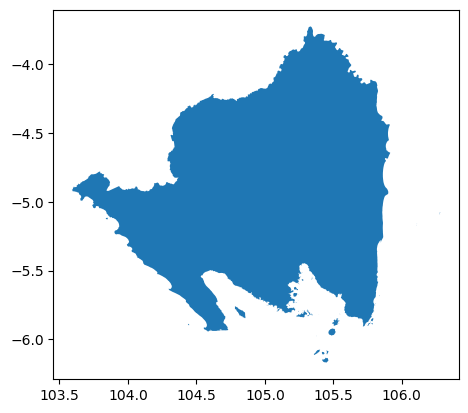

In [ ]:
import geopandas as gpd

# Path ke file shapefile
shapefile = r"C:\Users\ASUS\Downloads\Provinsi Lampung-PROV\Provinsi Lampung-PROV_PL.shp"

try:
    # Membaca shapefile
    gdf_boundary = gpd.read_file(shapefile)

    # Menampilkan beberapa baris pertama data
    print("Shapefile berhasil dimuat!")
    print(gdf_boundary.head())

    # Menampilkan CRS (Coordinate Reference System)
    print("\nSistem Referensi Koordinat (CRS):", gdf_boundary.crs)

    # Visualisasi data geografis
    gdf_boundary.plot()

except Exception as e:
    # Menangkap kesalahan dan menampilkannya
    print("Terjadi kesalahan saat membaca shapefile:")
    print(e)


CRS yang digunakan adalah EPSG:4326, yaitu sistem referensi berbasis WGS84 (World Geodetic System 1984). Sistem ini menggunakan koordinat lintang dan bujur dalam derajat desimal, yang umum digunakan untuk data geografis global.

Peta wilayah Provinsi Lampung divisualisasikan dalam format MULTIPOLYGON, yang menggambarkan batas-batas wilayah dengan detail spasial.

In [ ]:
data['geometry'] = data.apply(lambda row: Point(row['longitude'], row['latitude']),
axis=1)
gdf = gpd.GeoDataFrame(data, geometry='geometry')

In [ ]:
# Jika gdf_boundary memiliki beberapa geometri, gunakan unary_union
gdf_boundary_union = gdf_boundary.unary_union
# Filter data untuk menyertakan hanya yang berada dalam batas wilayah
gdf_within_boundary = gdf[gdf.within(gdf_boundary_union)]

In [ ]:
# Simpan data yang berada dalam batas wilayah ke CSV atau format lain
gdf_within_boundary.to_csv("lampung.csv", index=False)

In [ ]:
lampung= pd.read_csv("lampung.csv")
df = lampung[['latitude', 'longitude']].values

In [ ]:
def greatcircle(x, y):
    lat1, long1 = x[0], x[1]
    lat2, long2 = y[0], y[1]
    dist = great_circle((lat1, long1), (lat2, long2)).meters
    return dist


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
# Ensure 'lampung' DataFrame exists and has 'latitude' and 'longitude' columns
# (Assuming 'lampung' is a pre-defined DataFrame)
if 'lampung' not in globals():
 raise ValueError("DataFrame 'lampung' not defined.")
if 'latitude' not in lampung.columns or 'longitude' not in lampung.columns:
 raise ValueError("The 'lampung' DataFrame must contain 'latitude' and 'longitude' columns.")
# Create a copy of the relevant data
df_dbc = lampung[['latitude', 'longitude']].copy() # Copy to preserve original data
# Ensure df_dbc is a DataFrame and contains the required columns
if not isinstance(df_dbc, pd.DataFrame):
 raise TypeError("Expected 'df_dbc' to be a Pandas DataFrame.")
# Define a simple great-circle distance function (in degrees)
def greatcircle(coords):
 # Converts degrees to radians
 coords = np.radians(coords)
 return haversine_distances([coords]) * 6371000 # Earth's radius in meters
# Apply DBSCAN clustering
# Use metric='euclidean' or haversine-based distances if great-circle metric is too complex
dbc = DBSCAN(eps=0.04, min_samples=4, metric='euclidean').fit(df_dbc)
# Get the cluster labels
labels = dbc.labels_
unique_labels = np.unique(labels)
print("Unique labels:", unique_labels)
# Add the cluster labels to the DataFrame
df_dbc['Cluster'] = labels

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36]


In [ ]:
location = df_dbc['latitude'].mean(), df_dbc['longitude'].mean()

In [ ]:
import folium

m = folium.Map(location=location, zoom_start=8)
folium.TileLayer('cartodbpositron').add_to(m)
clust_colours = [
    '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f',
    '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#5F9EA0', '#DC143C',
    '#00FFFF', '#B8860B', '#8B008B', '#2F4F4F'
]

for i in range(0, len(df_dbc)):
    colouridx = df_dbc['Cluster'].iloc[i]
    if colouridx == -1:
        pass
    else:
        col = clust_colours[colouridx % len(clust_colours)]
        folium.CircleMarker(
            [df_dbc['latitude'].iloc[i], df_dbc['longitude'].iloc[i]],
            radius=1,
            color=col,
            fill_color=col
        ).add_to(m)

m

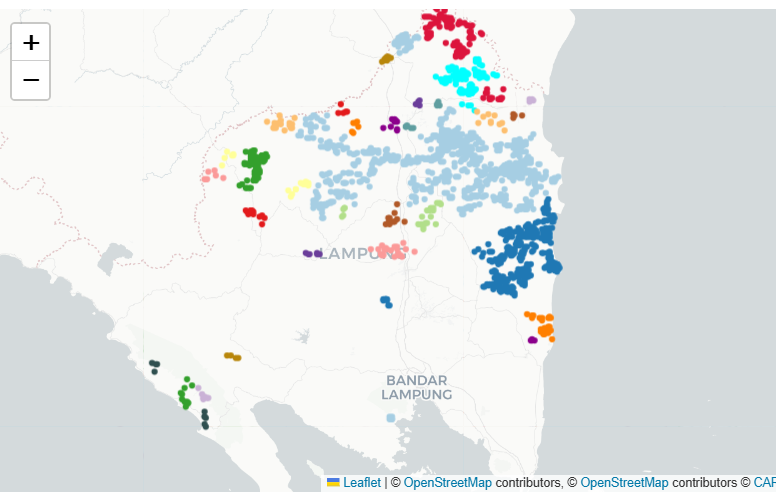

### **Interpretasi Peta Klasterisasi**

1. **Distribusi Klaster**  
   - Titik kebakaran di Provinsi Lampung terbagi dalam beberapa klaster berdasarkan kedekatan geografis.  
   - Warna yang berbeda menunjukkan klaster-klaster teridentifikasi, di mana setiap klaster terdiri dari titik-titik yang memiliki kepadatan geografis yang cukup tinggi.

2. **Area dengan Kepadatan Kebakaran Tinggi**  
   - Klaster besar terletak di bagian **tengah hingga timur Provinsi Lampung**, menunjukkan bahwa wilayah ini memiliki konsentrasi kebakaran yang lebih tinggi dibandingkan wilayah lain.  
   - Wilayah di sekitar **Bandar Lampung** juga memiliki beberapa klaster yang signifikan.

3. **Titik Noise**  
   - Beberapa titik tidak termasuk dalam klaster mana pun (label **-1**). Titik-titik ini kemungkinan mewakili kebakaran yang terjadi di lokasi terisolasi atau di luar radius kedekatan yang ditentukan oleh parameter DBSCAN.

4. **Implikasi Geografis**  
   - Klasterisasi ini dapat membantu mengidentifikasi area rawan kebakaran untuk prioritas pengawasan atau mitigasi.  
   - Area dengan konsentrasi tinggi kebakaran mungkin dipengaruhi oleh faktor lingkungan seperti jenis vegetasi, aktivitas manusia, atau kondisi cuaca.

5. **Arah Penggunaan**  
   - Hasil klasterisasi ini dapat dimanfaatkan oleh pemerintah daerah atau lembaga lingkungan untuk merencanakan tindakan preventif, seperti patroli kebakaran, penyediaan alat pemadam, atau program kesadaran masyarakat.

